# Лабораторная работа №1

*Водяный Михаил, РИ-440005*

## Задание
Выполнить статистический анализ свободных русскоязычного и англоязычного текстов (по вариантам):
* организованного текста
* сжатого файла
* соответствующих шифртекстов, созданных одной из программ симметричного шифрования.

Произвести сравнительный анализ статистик. Для экспресс-анализа использовать посимвольные гистограммы, автокорреляционную функцию, статистические тесты.

## 1. Определение функций

### 1.1. Экспресс-анализ

In [23]:
def express_analyse(text, name):
    char_freq(text, name)
    acf_func(text, name)

### 1.2. Построение графиков

In [24]:
from collections import Counter, OrderedDict

def symbol_count_dict(text):
    symbolCounter = Counter(text).items()
    return OrderedDict(sorted(symbolCounter))

import matplotlib.pyplot as plt

def make_plot(data=None, dictionary=None, xlabel=None, ylabel=None, size=None, title=None):
    
    if dictionary is not None:
        x_xticks = [repr(x) for x in dictionary.keys()]
        x = range(len(x_xticks))
        y = [round(dictionary[x]/len(dictionary), 2) for x in dictionary]
        plt.xticks(x, x_xticks)
        plt.bar(x, y, align='center')  
    elif data is not None:
        plt.plot(data)
    else:
        print('Set data or dictionary')
        return None
        
    if xlabel is not None:
        plt.xlabel(xlabel)
        
    if ylabel is not None:
        plt.ylabel(ylabel)
    
    if size is not None:
        plt.gcf().set_size_inches(size)
        
    if title is not None:
        plt.title(title)
        
    plt.show()

In [25]:
def char_freq(text, name):
    freq = symbol_count_dict(text)
    title = 'Посимвольная гистограмма ' + name
    make_plot(dictionary=freq, size=(20,10), title=title, ylabel='Частота (%)')
    
from statsmodels.tsa.stattools import acf

def acf_func(text, name):
    charCodeList = list(map(ord, text))
    title = 'Автокорреляционная функция ' + name
    make_plot(data=acf(charCodeList), title=title, ylabel='АКФ', xlabel='t-dt')

### 1.3. Шифрование текста

In [26]:
def encrypt(text=None, filename=None, save_gamma=False, gamma_filename=None):
    
    if text is None:
        if filename is not None:
            with open(filename, 'r') as file:
                text = file.read()
        else:
            print('Set text or filename')
            return None
               
    gamma = maclaren_marsaglia(len(text))
    
    if save_gamma == True:
        with open(gamma_filename, 'w') as file:
            file.write(str(gamma))
    
    code = code_list(text, gamma)
        
    return ''.join(code)

from random import randint

CONST_A = 16807
CONST_M = 2147483647

def maclaren_marsaglia(length, k = 128): 
    x = 1
    lgc = list()
    for i in range(length):     
        x = (CONST_A * x) % CONST_M      
        lgc.append(x)
        
    gamma = list()
    for i in range(length):
        r = randint(0, k-1)
        gamma.append(lgc[r])

    return gamma

def code_list(txt, gamma):
    code = list()
    for (c, g) in zip(txt, gamma):
        code.append(chr(ord(c) ^ g%128))
    return code

## 2. Загрузка данных

### 2.1 Считывание текстов

Задаем название текстов соответственно варианту.

In [27]:
folder = 'Data//'
filenameList = [folder + 'a06.txt', folder + 'b06.txt']

In [28]:
textList = list()

for filename in filenameList:
    with open(filename, 'r') as file:
        textList.append(file.read())

### 2.2 Сжатие текстов

In [29]:
from zlib import compress

textCompressedList = list()

for index, text in enumerate(textList):
    textCompressed = compress(bytes(text, 'utf-8'))
    textCompressed = str(textCompressed)    
    textCompressedList.append(textCompressed)
    
    with open(folder + 'compressed' + str(index) + '.txt', 'w') as file:
        file.write(str(textCompressed))

### 2.3 Шифрование текстов

In [30]:
textEncryptedList = list()

for text in textList:
    textEncryptedList.append(encrypt(text))

## 3. Анализ

### 3.1 Анализ организованного текста

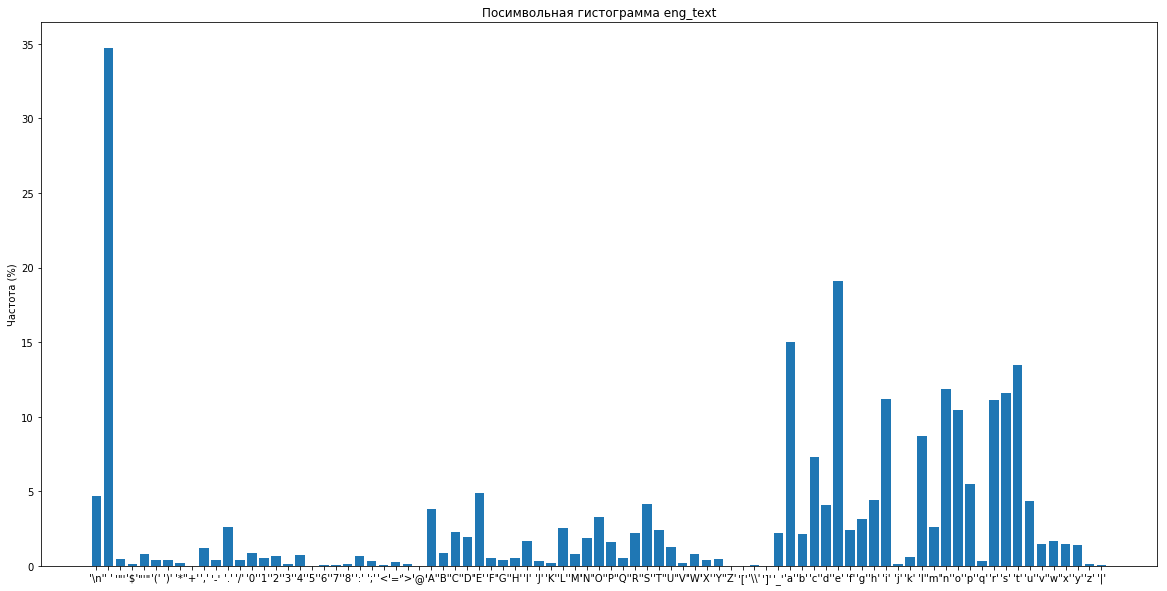

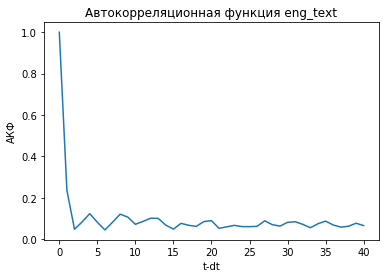

In [31]:
express_analyse(textList[0], 'eng_text')

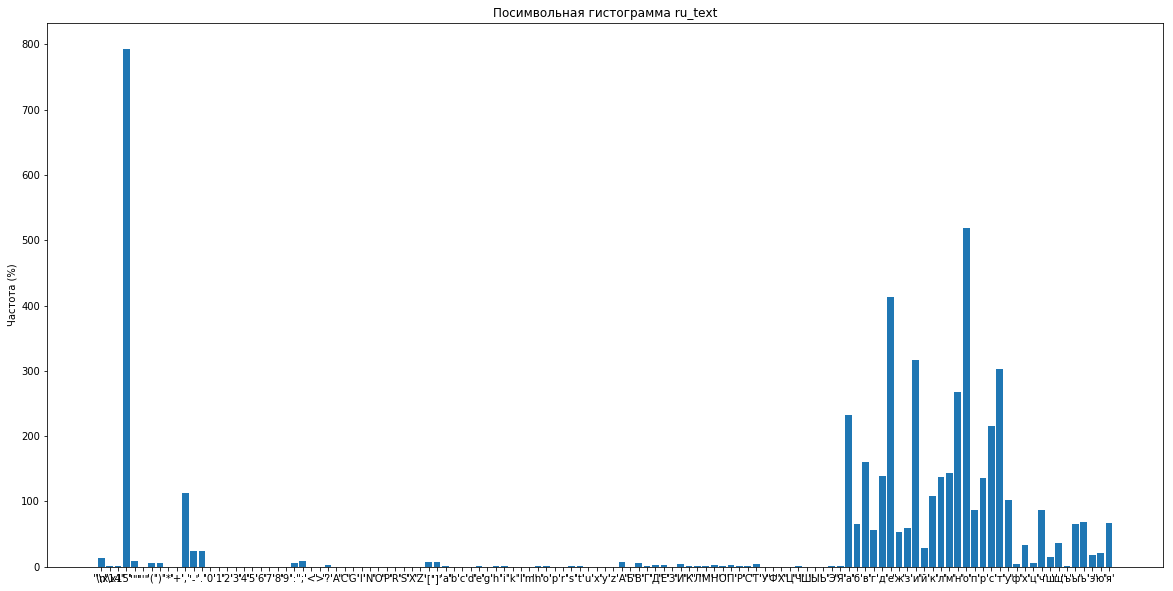

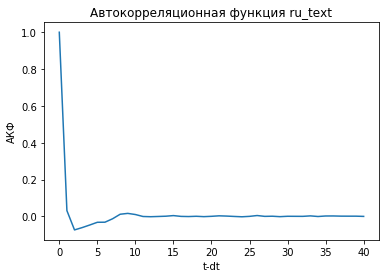

In [32]:
express_analyse(textList[1], 'ru_text')

Тексты на разных языках имеют разные графики из-за разницы в алфавите.

### 3.2 Анализ сжатого текста

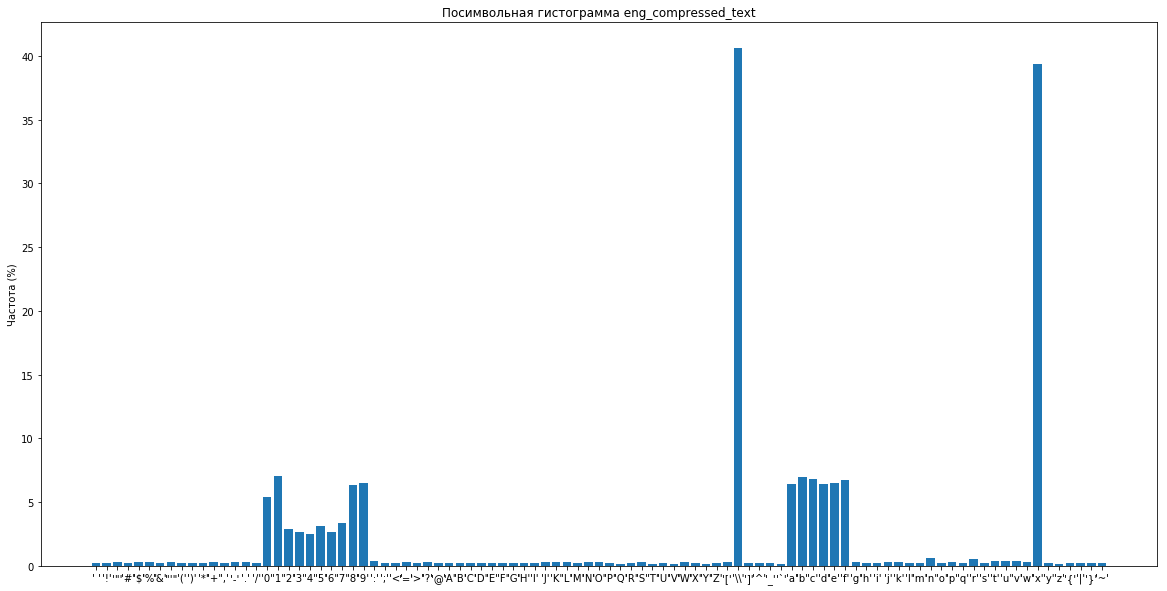

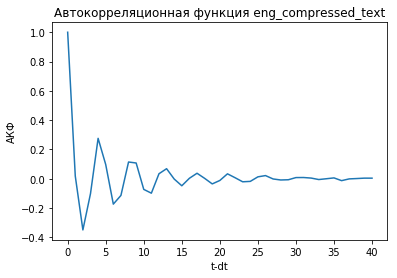

In [33]:
express_analyse(textCompressedList[0], 'eng_compressed_text')

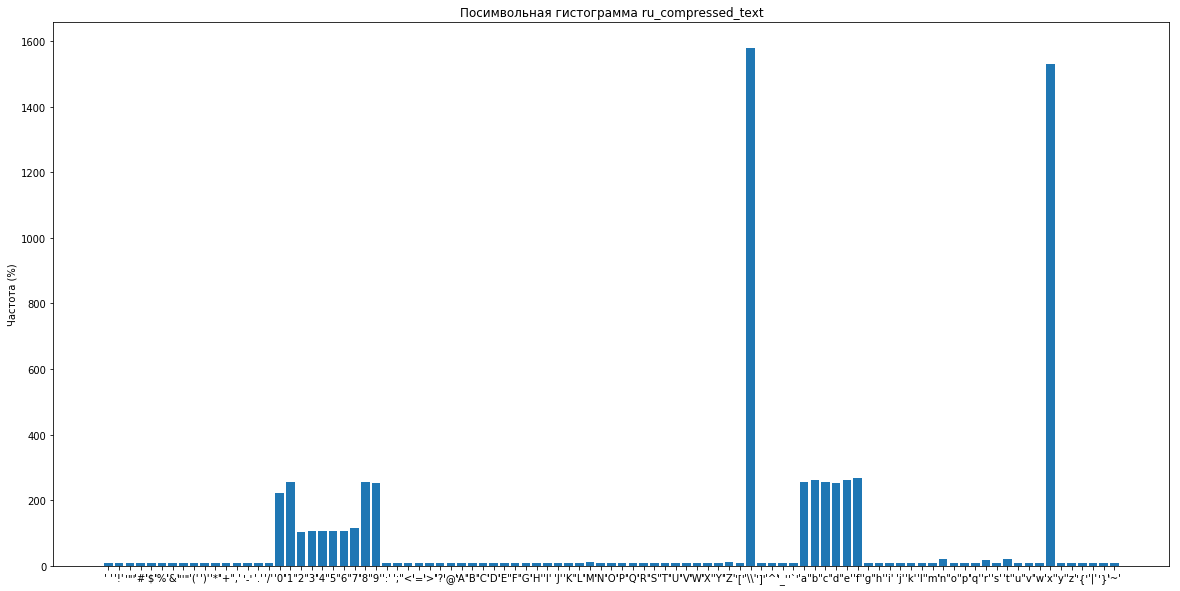

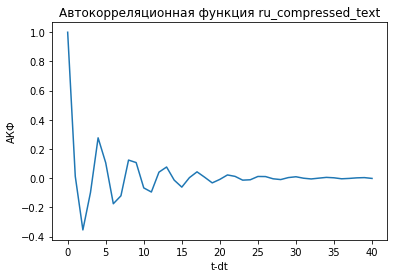

In [34]:
express_analyse(textCompressedList[1], 'ru_compressed_text')

Графики экспресс анализа схожи для сжатых текстов. Это происходит потому, что используется один и тот же алгоритм сжатия.

### 3.3 Анализ зашифрованного текста

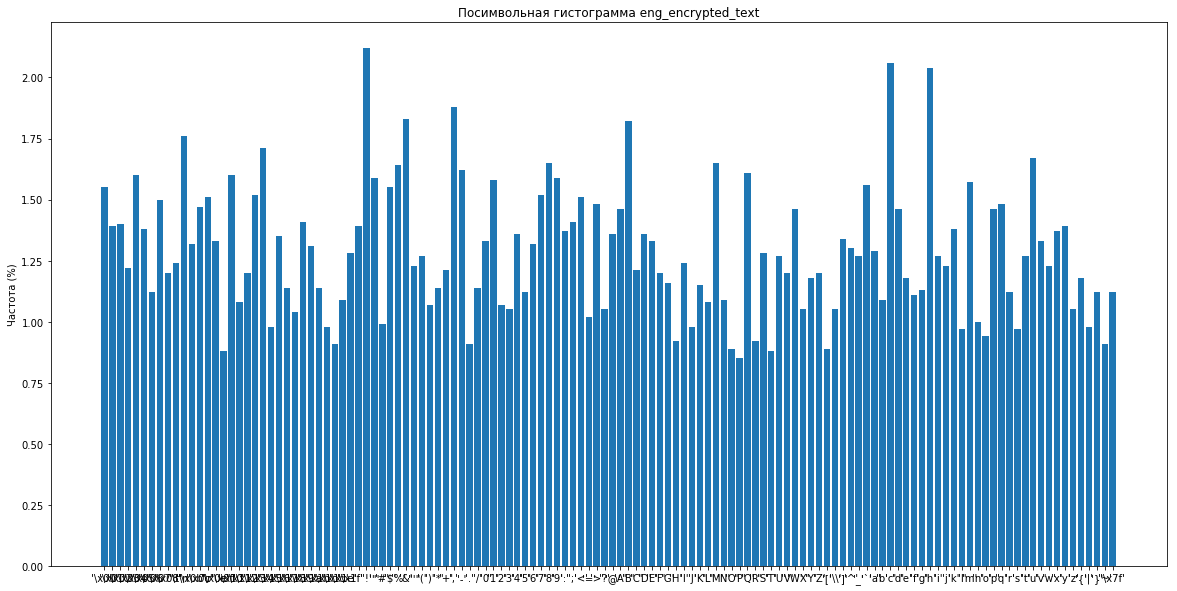

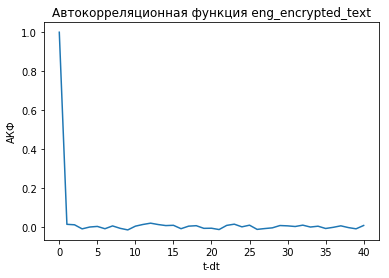

In [35]:
express_analyse(textEncryptedList[0], 'eng_encrypted_text')

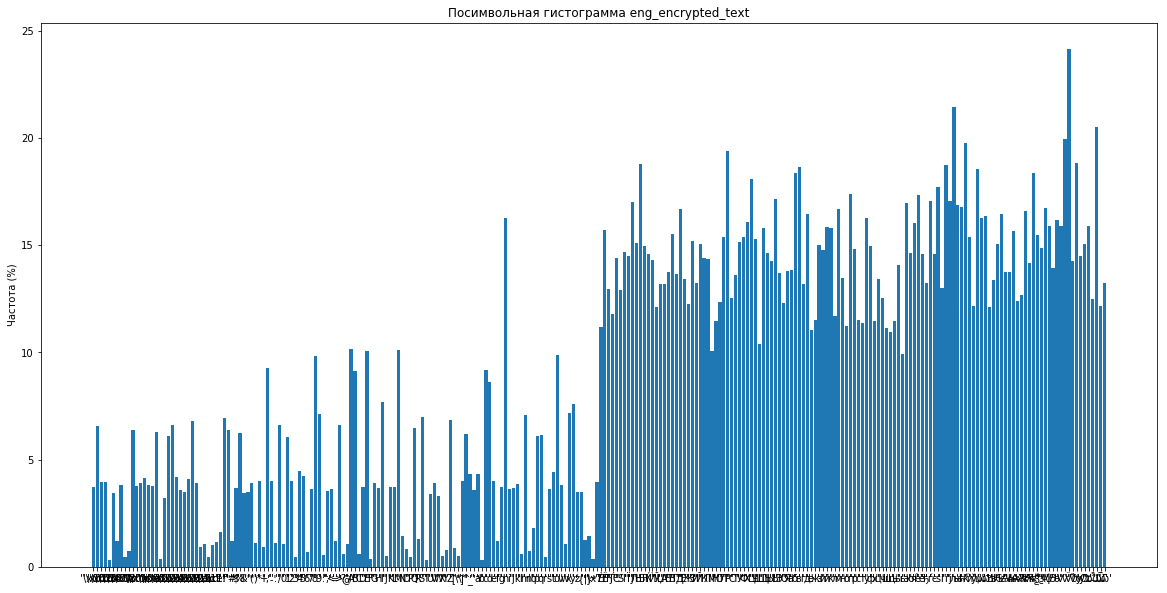

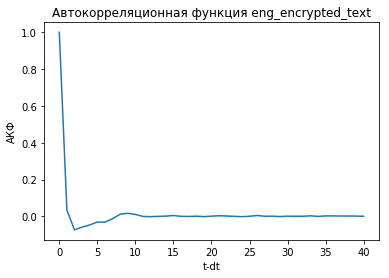

In [36]:
express_analyse(textEncryptedList[1], 'eng_encrypted_text')

Графики экспресс-анализа для различных текстов отличаются, в отличие от сжатых текстов. Это происходит из-за генерации уникальной гаммы для каждого текста.